In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data to see the first few rows and summary information
data_path = 'Data/data_all.csv'
data = pd.read_csv(data_path)

org_data = data.copy()

# Color definition
color_main = '#6ebb83'
color_second = '#18252b'
color_CS = '#ffcd8c'
color_UC = '#a8d6b5'

# Topics columns identified based on their names
topic_columns = [col for col in data.columns if 'topic_' in col]

# Rename column prop_state_onhprop_state_ to prop_state_onhold
# data.rename(columns={'prop_state_On.hprop_state_': 'prop_state_On.hold'}, inplace=True)

# Display the first few rows and data information
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11080 entries, 0 to 11079
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number                             11080 non-null  object 
 1   account                            11080 non-null  object 
 2   created_by_group                   11080 non-null  object 
 3   business_service                   11080 non-null  object 
 4   assignment_group                   11080 non-null  object 
 5   impact                             11080 non-null  object 
 6   priority                           11080 non-null  object 
 7   urgency                            11080 non-null  object 
 8   sla_has_breached                   11080 non-null  bool   
 9   case_cause                         11080 non-null  object 
 10  resolution_code                    11080 non-null  object 
 11  opened                             11080 non-null  obj

(      number                               account created_by_group  \
 0  CS0011381              Saphir Group Networks AG            Unico   
 1  CS0011797                             Siloah AG            Unico   
 2  CS0011896                         Interhydro AG            Unico   
 3  CS0012000  Verband Regionaler SD Münchenbuchsee             User   
 4  CS0012311                     Schilthornbahn AG            Unico   
 
                                  business_service        assignment_group  \
 0                               Managed Workplace  Service Desk 1st Level   
 1                                  Hosted Desktop  Service Desk 1st Level   
 2  No Business Service - only best effort service           IT Operations   
 3  No Business Service - only best effort service  Service Desk 2nd Level   
 4  No Business Service - only best effort service           IT Operations   
 
     impact      priority     urgency  sla_has_breached  \
 0  3 - Low       4 - Low  2 - Medium

In [2]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Display the columns with missing data and their count of missing values
missing_data[missing_data > 0]


description    1192
cause          1946
close_notes       3
dtype: int64

In [3]:
# Confirm no more missing values
data.isnull().sum().sum()

# Generate descriptive statistics for the cleaned data
descriptive_stats = data.describe()

# Display the descriptive statistics
descriptive_stats


,time_worked,openedToClosed,business_percentage,cluster,topic_network_server,topic_performance_responseIssues,topic_vdi_hostedDesktop,topic_authentication_accounts,topic_officeApplications,topic_printing_drive,...,prop_state_Open,prop_state_Resolved,prop_state_Work.in.Progress,prop_group_Other,prop_group_Service.Desk.1st.Level,prop_group_Service.Desk.2nd.Level,prop_group_Squad.Platform,prop_group_Squad.Server,prop_group_Unico.Workplace,prop_group_Vorortsupport.Siloah
count,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,...,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000
mean,2383.819224,280.565955,27.022679,3.264531,0.156052,0.150904,0.187272,0.140190,0.145933,0.133573,...,8.302644,63.430382,7.934166,14.747702,71.430360,1.665161,4.413380,2.735907,2.768542,2.238961
std,2220.195377,231.489951,44.142630,2.557501,0.228676,0.229926,0.259921,0.234573,0.240967,0.224704,...,19.358697,38.622326,19.628135,32.129236,42.974159,11.908168,19.624271,14.993731,15.982228,14.134615
min,360.000000,12.058889,0.030000,0.000000,0.000670,0.000177,0.000177,0.000177,0.000177,0.000177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,175.961181,0.110000,1.000000,0.009351,0.008770,0.010780,0.008755,0.008755,0.008758,...,0.010000,24.455000,0.000000,0.000000,15.097500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1440.000000,183.426806,3.320000,3.000000,0.023426,0.017657,0.035157,0.017533,0.017533,0.017533,...,0.250000,82.600000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3060.000000,344.578819,31.040000,5.000000,0.224686,0.213225,0.299885,0.160122,0.170302,0.153028,...,4.420000,98.710000,1.830000,1.010000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7379.000000,804.900972,135.010000,12.000000,0.998939,0.971997,0.971000,0.969970,0.967658,0.973695,...,99.960000,99.960000,99.940000,100.010000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


c:\Users\Student\miniforge-pypy3\envs\Thesis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


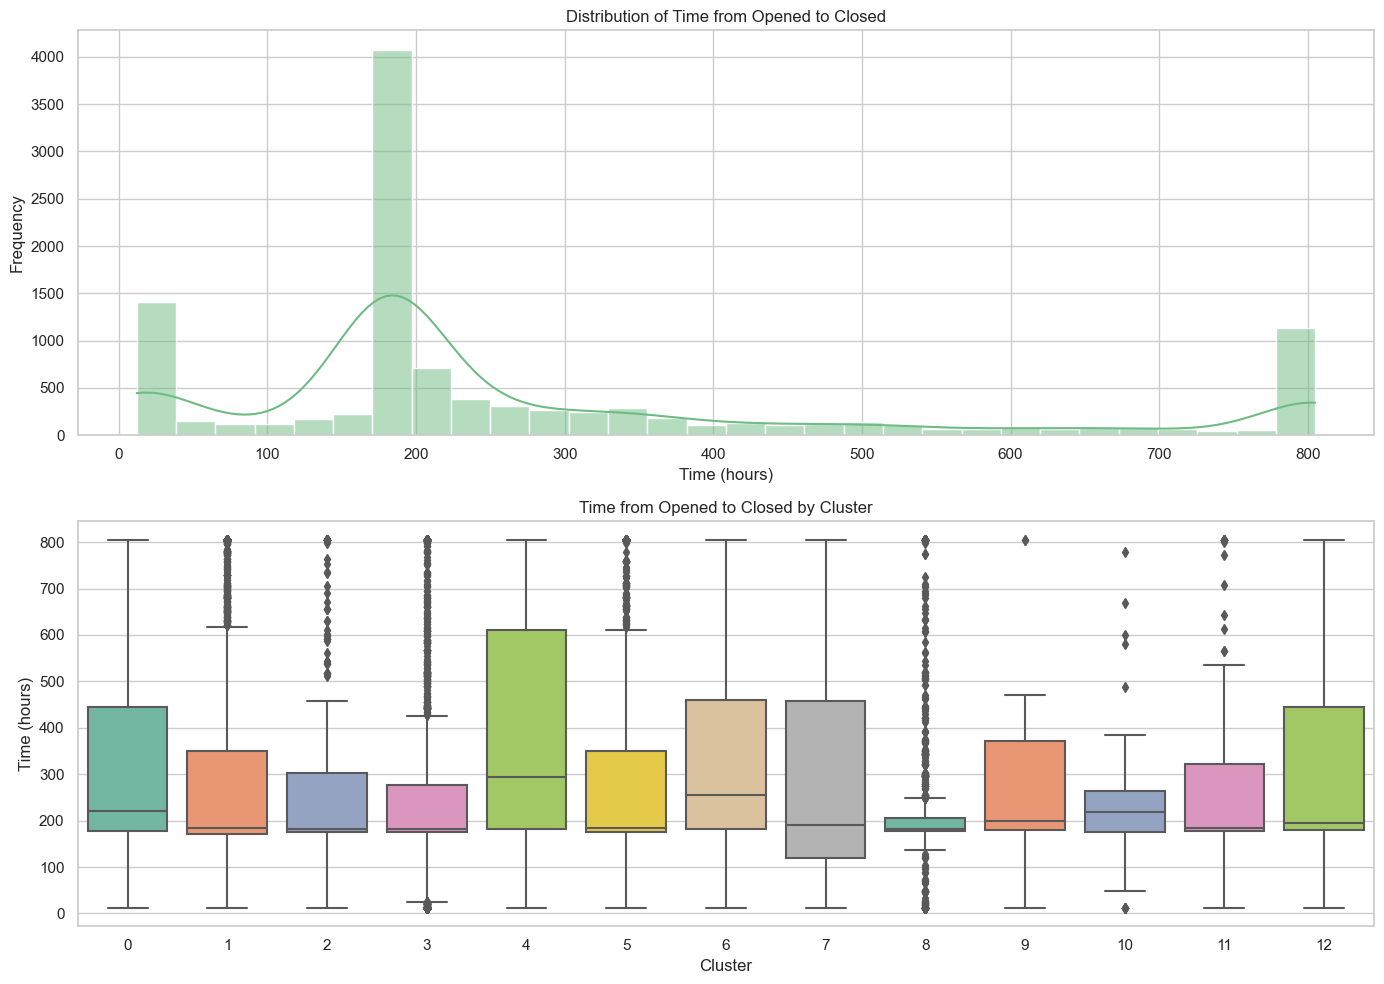

In [4]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Histogram of 'openedToClosed'
sns.histplot(data['openedToClosed'], bins=30, ax=axes[0], color=color_main, kde=True)
axes[0].set_title('Distribution of Time from Opened to Closed')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Frequency')


# Boxplot of 'openedToClosed' by 'cluster'
sns.boxplot(x='cluster', y='openedToClosed', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Time from Opened to Closed by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Time (hours)')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




C:\Users\Student\AppData\Local\Temp\ipykernel_15684\3367249450.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
C:\Users\Student\AppData\Local\Temp\ipykernel_15684\3367249450.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
C:\Users\Student\AppData\Local\Temp\ipykernel_15684\3367249450.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()
C:\Users\Student\AppData\Local\Temp\ipykernel_15684\3367249450.py:84: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


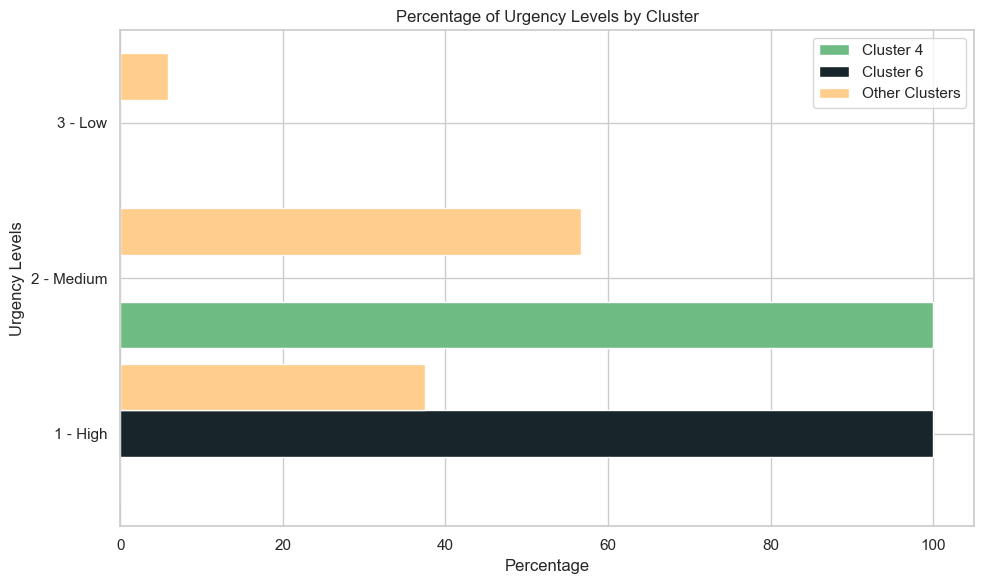

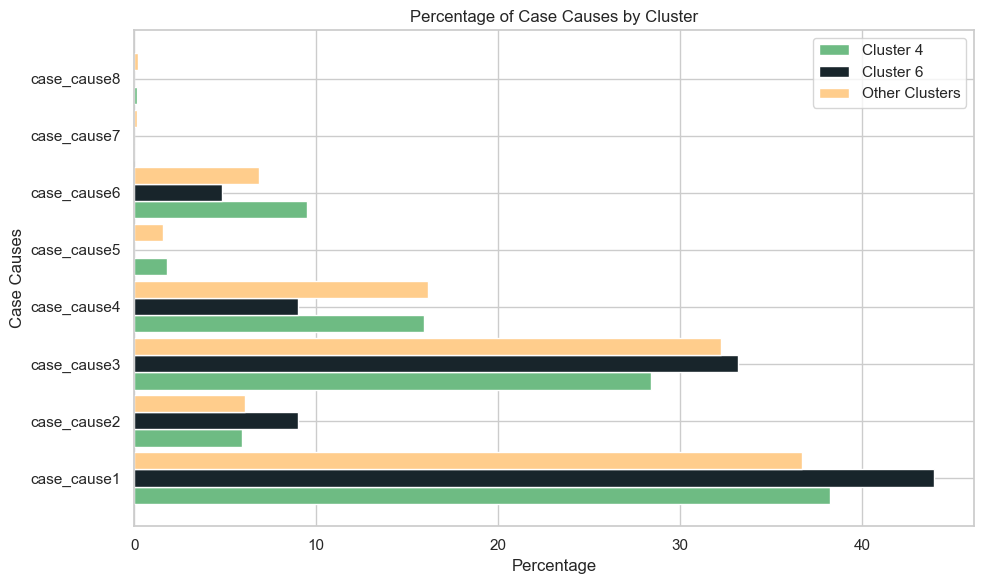

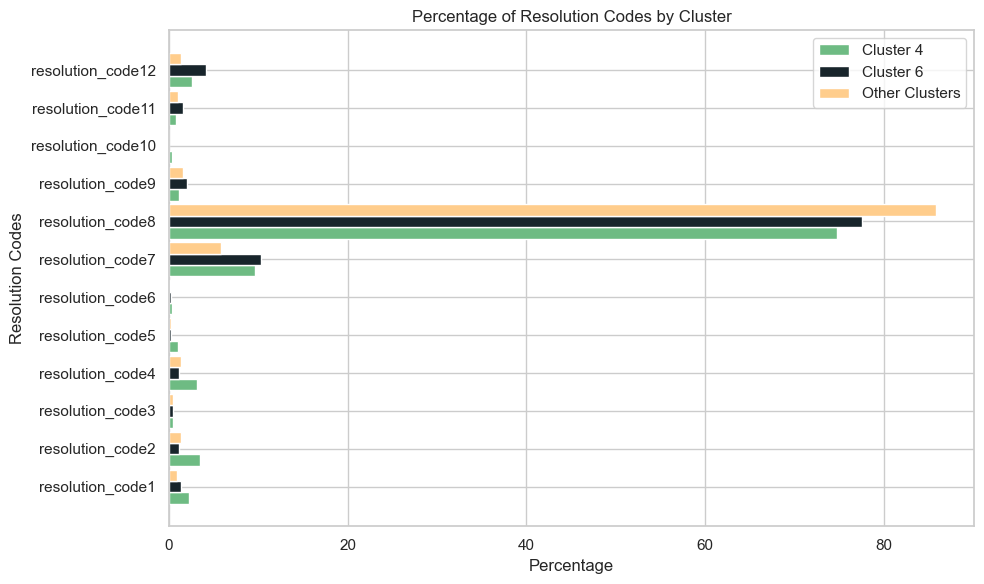

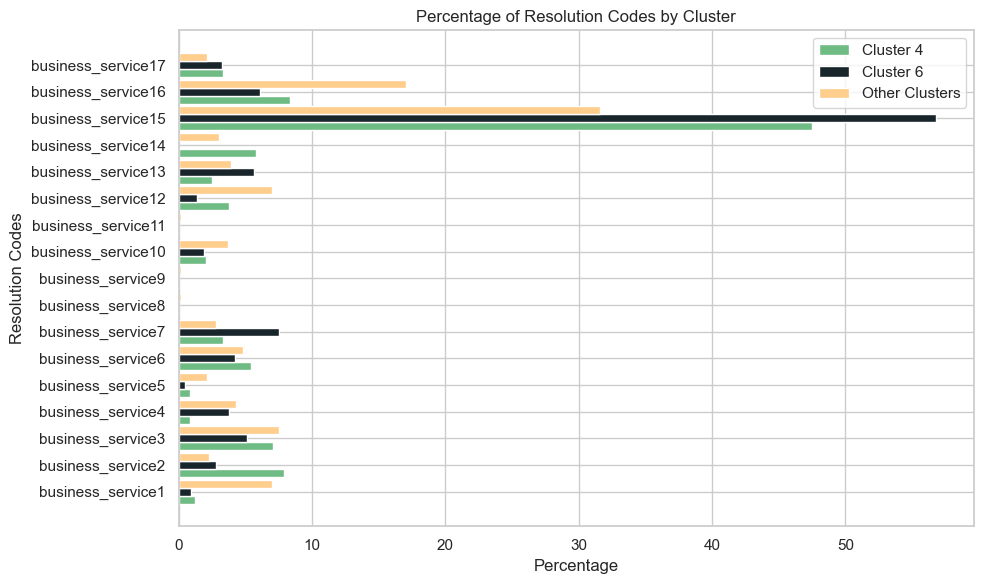

In [8]:
# Assuming 'data' is your DataFrame and the percentages have been calculated
data['Cluster_Group'] = data['cluster'].apply(lambda x: 'Cluster 4' if x == 4 else ('Cluster 6' if x == 6 else 'Other Clusters'))

def calculate_percentage(column):
    return data.groupby('Cluster_Group')[column].value_counts(normalize=True).unstack(fill_value=0) * 100

# We have to filter out only data after 01.03.2022 for the business service, because since then this field is managed
data_bs = data[data['opened'] >= '2022-03-01']
def calculate_percentage_bs(column):
    return data_bs.groupby('Cluster_Group')[column].value_counts(normalize=True).unstack(fill_value=0) * 100

# Calculate percentages for 'urgency', 'case_cause', 'resolution_code'
urgency_percentage = calculate_percentage('urgency')
case_cause_percentage = calculate_percentage('case_cause')
resolution_code_percentage = calculate_percentage('resolution_code')
business_service_percentage = calculate_percentage_bs('business_service')

# Define the color map explicitly
cluster_colors = {'Cluster 4': color_main, 'Cluster 6': color_second, 'Other Clusters': color_CS}
cluster_offset = {'Cluster 4': 0, 'Cluster 6': 0.3, 'Other Clusters': 0.6} 

# Function to plot bars side-by-side for each variable
def plot_side_by_side(ax, percentages, title, xlabel, ylabel):
    categories = percentages.columns
    width = 0.3  # width of the bars
    for cluster, color in cluster_colors.items():
        offsets = [x + cluster_offset[cluster] for x in range(len(categories))]
        ax.barh(offsets, percentages.loc[cluster], color=color, label=cluster, height=width)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks([x + 0.3 for x in range(len(categories))])  # Adjust y-ticks to align with the middle of the groups
    ax.set_yticklabels(categories)
    ax.legend()

# Create separate plots
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax1, urgency_percentage, 'Percentage of Urgency Levels by Cluster', 'Percentage', 'Urgency Levels')
fig1.tight_layout()
fig1.show()


# generate a dictionary of new labels for the case_cause columns
case_cause_labels_org = [col for col in case_cause_percentage.columns]
case_cause_labels = {v: f'case_cause{i+1}' for i, v in enumerate(case_cause_percentage.columns)}
case_cause_labels_df = pd.DataFrame(case_cause_labels.items(), columns=['Original', 'Rename'])

# save as csv
# case_cause_labels_df.to_csv('Data/tables/case_cause_labels.csv', index=False)
case_cause_percentage.rename(columns=case_cause_labels, inplace=True)


fig2, ax2 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax2, case_cause_percentage, 'Percentage of Case Causes by Cluster', 'Percentage', 'Case Causes')
fig2.tight_layout()
fig2.show()

# generate a dictionary of new labels for the resolution_code columns
resolution_code_labels_org = [col for col in resolution_code_percentage.columns]
resolution_code_labels = {v: f'resolution_code{i+1}' for i, v in enumerate(resolution_code_percentage.columns)}
resolution_code_labels_df = pd.DataFrame(resolution_code_labels.items(), columns=['Original', 'Rename'])

# save as csv
# resolution_code_labels_df.to_csv('Data/tables/resolution_code_labels.csv', index=False)
resolution_code_percentage.rename(columns=resolution_code_labels, inplace=True)

fig3, ax3 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax3, resolution_code_percentage, 'Percentage of Resolution Codes by Cluster', 'Percentage', 'Resolution Codes')
fig3.tight_layout()
fig3.show()

# generate a dictionary of new labels for the business_service columns
business_service_labels_org = [col for col in business_service_percentage.columns]
business_service_labels = {v: f'business_service{i+1}' for i, v in enumerate(business_service_percentage.columns)}
business_service_labels_df = pd.DataFrame(business_service_labels.items(), columns=['Original', 'Rename'])

# save as csv utf8 encoded
# business_service_labels_df.to_csv('Data/tables/business_service_labels.csv', index=False)
business_service_percentage.rename(columns=business_service_labels, inplace=True)

fig3, ax3 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax3, business_service_percentage, 'Percentage of Resolution Codes by Cluster', 'Percentage', 'Resolution Codes')
fig3.tight_layout()
fig3.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_5012\916155719.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


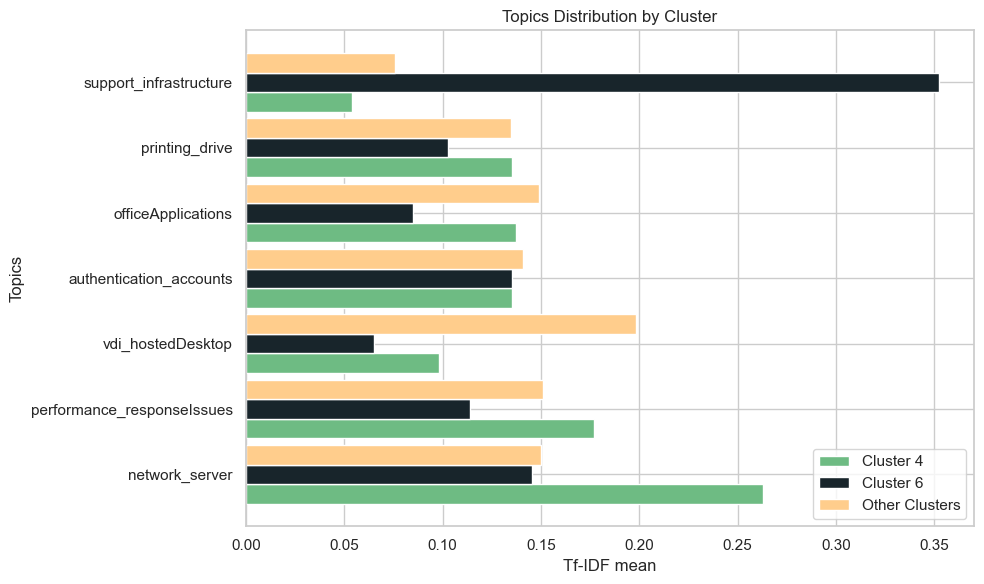

In [ ]:
def calculate_mean(column):
    return data.groupby('Cluster_Group')[column].mean()

# Calculate percentages for 'urgency', 'case_cause', 'resolution_code'
topic_mean = calculate_mean(topic_columns)
topic_mean.columns = topic_mean.columns.str.replace('topic_', '')

# Function to plot bars side-by-side for each variable
def plot_side_by_side(ax, percentages, title, xlabel, ylabel):
    categories = percentages.columns
    width = 0.3  # width of the bars
    for cluster, color in cluster_colors.items():
        offsets = [x + cluster_offset[cluster] for x in range(len(categories))]
        ax.barh(offsets, percentages.loc[cluster], color=color, label=cluster, height=width)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks([x + 0.3 for x in range(len(categories))])  # Adjust y-ticks to align with the middle of the groups
    ax.set_yticklabels(categories)
    ax.legend()

# Create separate plots
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax1, topic_mean, 'Topics Distribution by Cluster', 'Tf-IDF mean', 'Topics')
fig1.tight_layout()
fig1.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_5012\1589391378.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


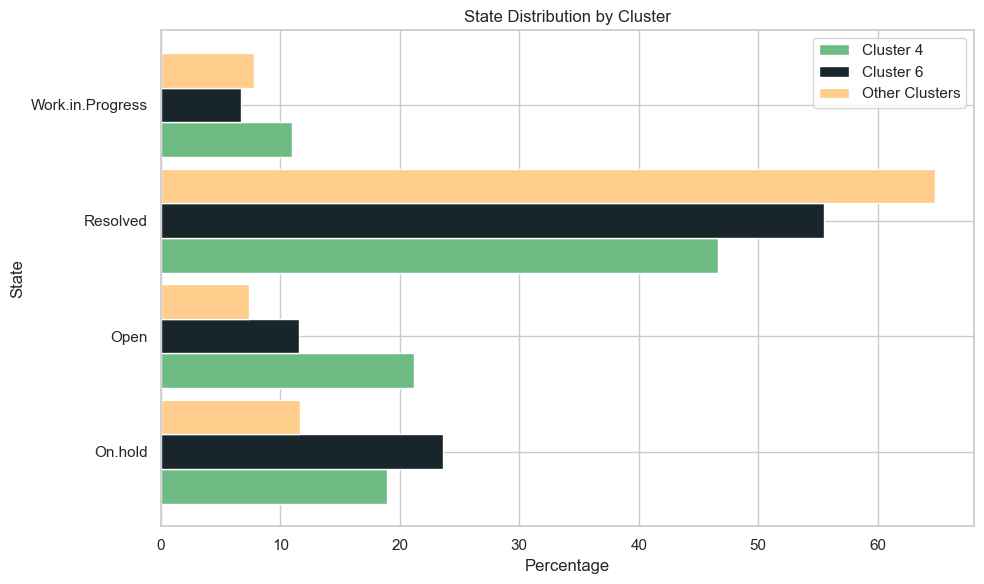

In [ ]:
# Filtering columns
state_columns = [col for col in data.columns if col.startswith('prop_state')]

# Remove columns with closed or cancelled
state_columns.remove('prop_state_Closed')
state_columns.remove('prop_state_Cancelled')


def calculate_mean(column):
    return data.groupby('Cluster_Group')[column].mean()

# Calculate percentages for 'urgency', 'case_cause', 'resolution_code'
state_mean = calculate_mean(state_columns)
state_mean.columns = state_mean.columns.str.replace('prop_state_', '')

# Function to plot bars side-by-side for each variable
def plot_side_by_side(ax, percentages, title, xlabel, ylabel):
    categories = percentages.columns
    width = 0.3  # width of the bars
    for cluster, color in cluster_colors.items():
        offsets = [x + cluster_offset[cluster] for x in range(len(categories))]
        ax.barh(offsets, percentages.loc[cluster], color=color, label=cluster, height=width)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks([x + 0.3 for x in range(len(categories))])  # Adjust y-ticks to align with the middle of the groups
    ax.set_yticklabels(categories)
    ax.legend()

# Create separate plots
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax1, state_mean, 'State Distribution by Cluster', 'Percentage', 'State')
fig1.tight_layout()
fig1.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_5012\3464926494.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


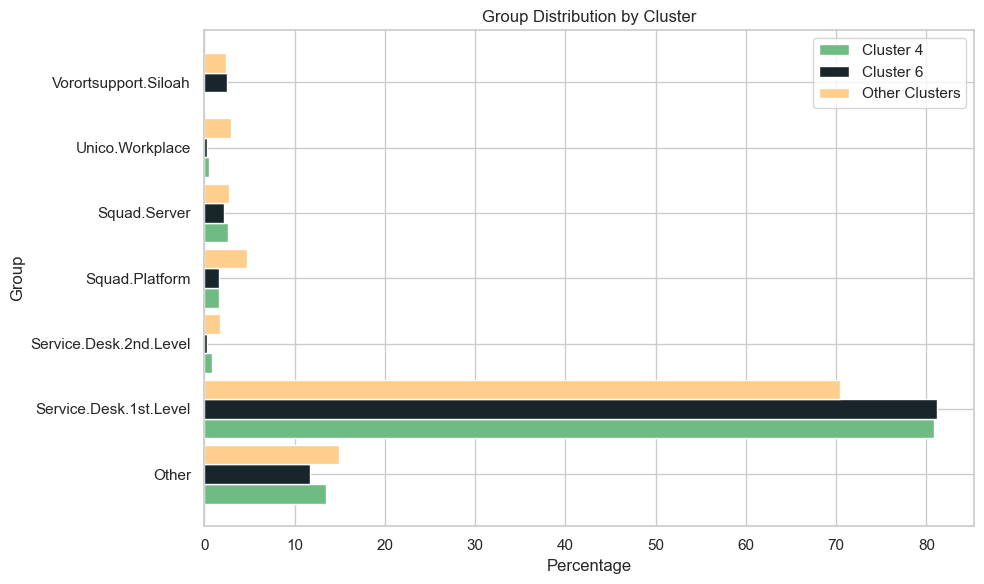

In [ ]:
# Filtering columns
group_columns = [col for col in data.columns if col.startswith('prop_group')]

# Calculate percentages for 'urgency', 'case_cause', 'resolution_code'
group_mean = calculate_mean(group_columns)
group_mean.columns = group_mean.columns.str.replace('prop_group_', '')

# Function to plot bars side-by-side for each variable
def plot_side_by_side(ax, percentages, title, xlabel, ylabel):
    categories = percentages.columns
    width = 0.3  # width of the bars
    for cluster, color in cluster_colors.items():
        offsets = [x + cluster_offset[cluster] for x in range(len(categories))]
        ax.barh(offsets, percentages.loc[cluster], color=color, label=cluster, height=width)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks([x + 0.3 for x in range(len(categories))])  # Adjust y-ticks to align with the middle of the groups
    ax.set_yticklabels(categories)
    ax.legend()

# Create separate plots
fig1, ax1 = plt.subplots(figsize=(10, 6))
plot_side_by_side(ax1, group_mean, 'Group Distribution by Cluster', 'Percentage', 'Group')
fig1.tight_layout()
fig1.show()

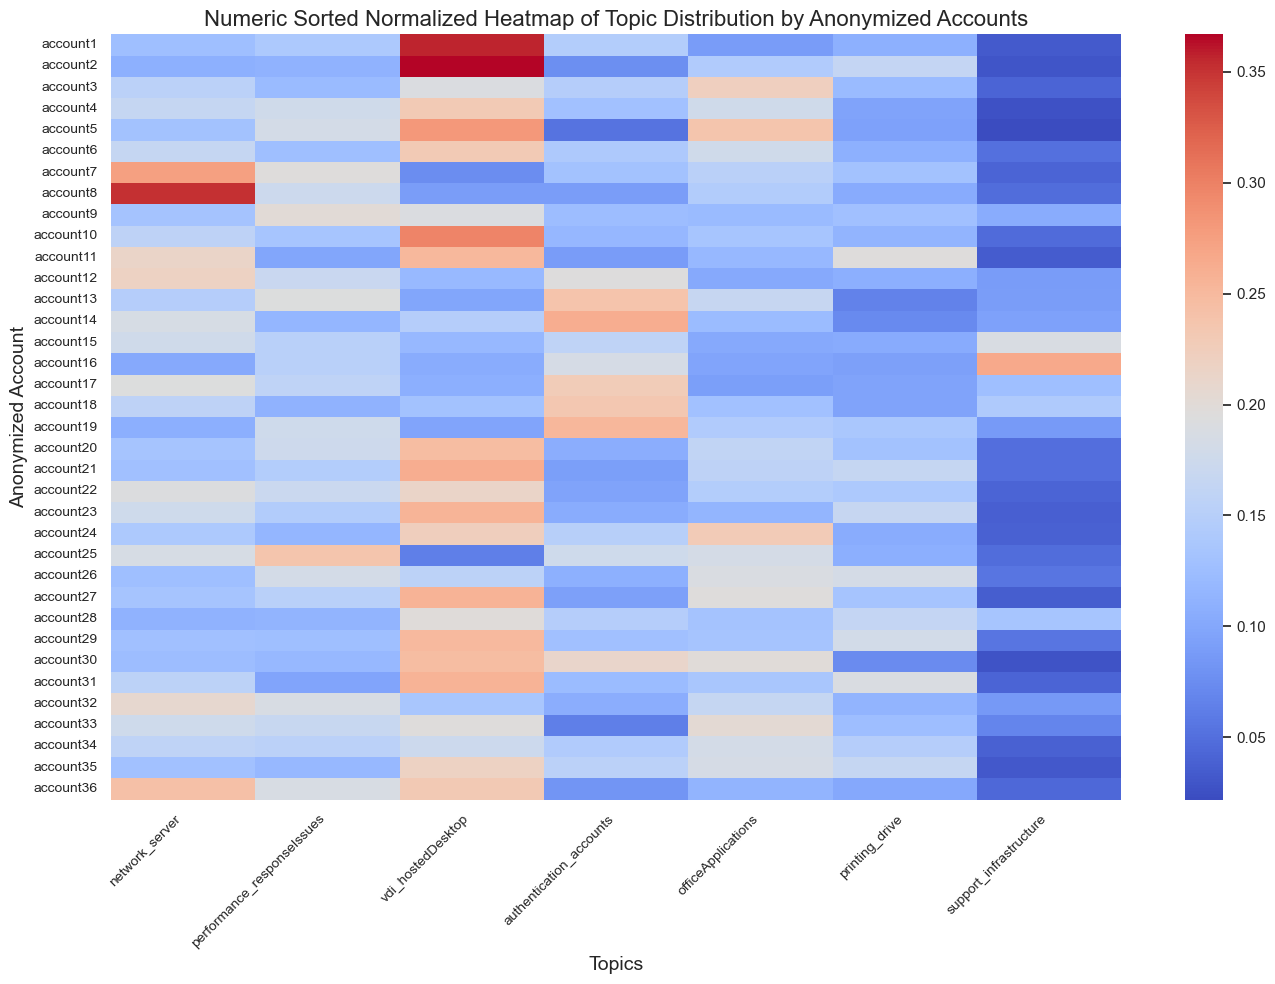

In [49]:
# Creating a mapping from account names to anonymized codes
account_mapping = {name: f'account{i+1}' for i, name in enumerate(sorted(set(data['account'])))}
data['account_code'] = data['account'].map(account_mapping)

# Grouping data by the new anonymized account codes and summing up topics
topic_by_account_code = data.groupby('account_code')[topic_columns].sum()
total_topics_per_account_code = topic_by_account_code.sum(axis=1)
normalized_topic_by_account_code = topic_by_account_code.div(total_topics_per_account_code, axis=0)
normalized_topic_by_account_code.columns = normalized_topic_by_account_code.columns.str.replace('topic_', '')

# Creating the mapping table
mapping_table = pd.DataFrame(list(account_mapping.items()), columns=['Original', 'Rename'])
sorted_mapping_table = mapping_table.sort_values(by='Rename')
# sorted_mapping_table.to_csv('Data/tables/account_labels.csv', index=False, encoding='UTF8')

# Extracting the numerical part of the account codes and sorting based on these numbers
sorted_normalized_topic_by_account_code = normalized_topic_by_account_code.loc[sorted_mapping_table['Rename']]
numeric_codes = sorted_normalized_topic_by_account_code.index.str.extract('(\d+)')[0].astype(int)
numeric_sorted_normalized_topic_by_account_code = sorted_normalized_topic_by_account_code.iloc[numeric_codes.argsort()]

# Re-plotting the heatmap with the new sorting
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_sorted_normalized_topic_by_account_code, cmap='coolwarm')
plt.title('Numeric Sorted Normalized Heatmap of Topic Distribution by Anonymized Accounts', fontsize=16)
plt.ylabel('Anonymized Account', fontsize=14)
plt.xlabel('Topics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Look at the Distribution where the Trouble was not an 1st Level Problem

c:\Users\Student\miniforge-pypy3\envs\Thesis\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


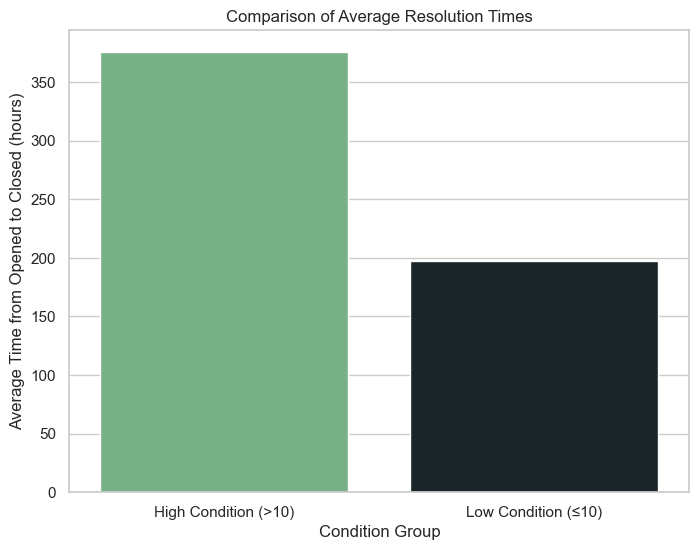

(375.4196144562192, 196.98522578287117)

In [18]:
from scipy.stats import ttest_ind

# Creating subsets based on the conditions provided
condition = ((data['prop_group_Service.Desk.1st.Level'] != 100) &
             (data['prop_group_Other'] > 20) |
             (data['prop_state_On.hold'] > 10) | 
             (data['prop_state_Open'] > 10))

subset_high = data[condition]
subset_low = data[~condition]

# Statistical test to compare 'openedToClosed' times between high and low condition subsets
t_stat, p_value = ttest_ind(subset_high['openedToClosed'], subset_low['openedToClosed'], equal_var=False)

# Mean comparison
mean_high = subset_high['openedToClosed'].mean()
mean_low = subset_low['openedToClosed'].mean()

t_stat, p_value, mean_high, mean_low

# Plot to show the comparison of average resolution times between high and low condition groups
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['High Condition (>10)', 'Low Condition (≤10)'], y=[mean_high, mean_low], palette=[color_main, color_second])
ax.set_title('Comparison of Average Resolution Times')
ax.set_ylabel('Average Time from Opened to Closed (hours)')
ax.set_xlabel('Condition Group')
plt.show()

mean_high, mean_low

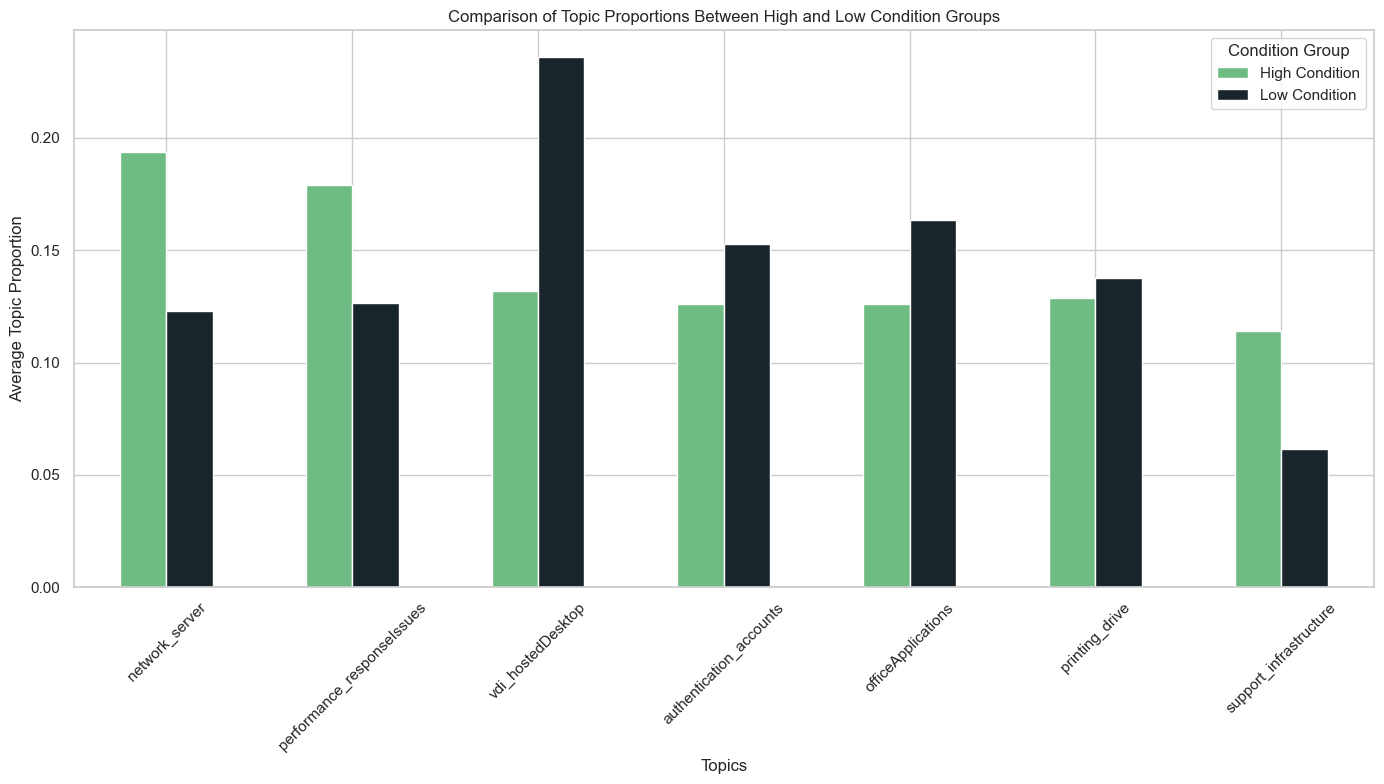

,High Condition,Low Condition
topic_network_server,0.193856,0.122741
topic_performance_responseIssues,0.178849,0.126280
topic_vdi_hostedDesktop,0.132022,0.235956
topic_authentication_accounts,0.126135,0.152575
topic_officeApplications,0.126250,0.163275
topic_printing_drive,0.128770,0.137806
topic_support_infrastructure,0.114117,0.061367


In [19]:
# Grouped analysis - calculate mean topic proportions for high condition and low condition groups
topic_means_high = subset_high[topic_columns].mean()
topic_means_low = subset_low[topic_columns].mean()

# Create a DataFrame for comparison
topic_comparison = pd.DataFrame({'High Condition': topic_means_high, 'Low Condition': topic_means_low})

# Plotting the topic proportions
fig, ax = plt.subplots(figsize=(14, 8))
topic_comparison.plot(kind='bar', ax=ax, color=[color_main, color_second])
ax.set_title('Comparison of Topic Proportions Between High and Low Condition Groups')
ax.set_ylabel('Average Topic Proportion')
ax.set_xlabel('Topics')
ax.set_xticklabels([col.replace('topic_', '') for col in topic_comparison.index], rotation=45)
plt.xticks(rotation=45)
plt.legend(title='Condition Group')
plt.tight_layout()
plt.show()

topic_comparison

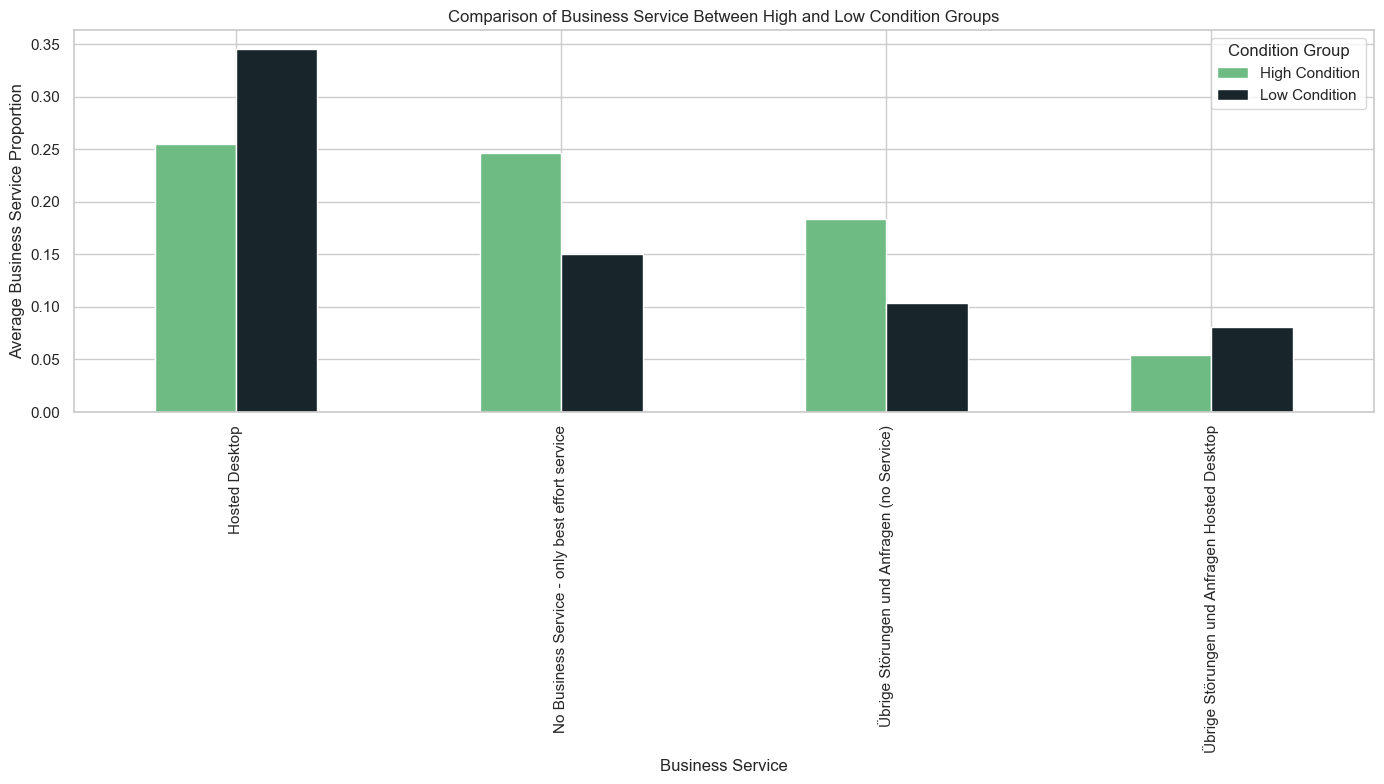

,High Condition,Low Condition
business_service,,
Hosted Desktop,0.255491,0.345840
No Business Service - only best effort service,0.246435,0.150594
Übrige Störungen und Anfragen (no Service),0.183815,0.104075
Übrige Störungen und Anfragen Hosted Desktop,0.054528,0.080475


In [153]:
# Grouped analysis - calculate mean topic proportions for high condition and low condition groups
bs_means_high = subset_high['business_service'].value_counts(normalize=True)
bs_means_low = subset_low['business_service'].value_counts(normalize=True)

# Take only top 3 of each group
bs_means_high = bs_means_high[:4]
bs_means_low = bs_means_low[:4]

# Create a DataFrame for comparison
bs_comparison = pd.DataFrame({'High Condition': bs_means_high, 'Low Condition': bs_means_low})

# Plotting the topic proportions
fig, ax = plt.subplots(figsize=(14, 8))
bs_comparison.plot(kind='bar', ax=ax, color=[color_main, color_second])
ax.set_title('Comparison of Business Service Between High and Low Condition Groups')
ax.set_ylabel('Average Business Service Proportion')
ax.set_xlabel('Business Service')
plt.xticks(rotation=90)
plt.legend(title='Condition Group')
plt.tight_layout()
plt.show()

bs_comparison


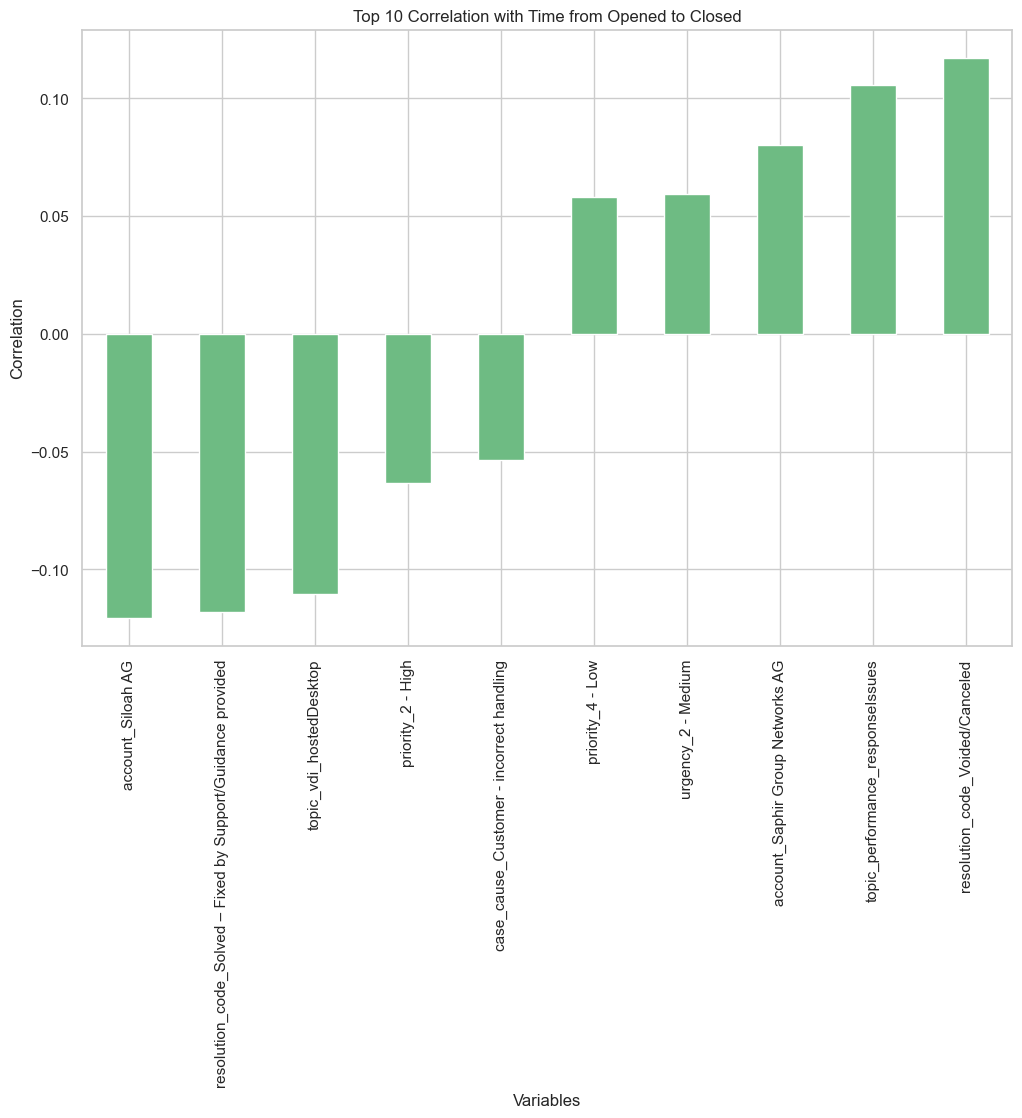

In [125]:
import numpy as np
# select columns 
data_corr = subset_high[['cluster', 'created_by_group', 'account', 'openedToClosed', 'case_cause', 'resolution_code', 'impact', 'priority', 'urgency']]
# Add topic columns
data_corr = pd.concat([data_corr, subset_high[topic_columns]], axis=1)

# Encode categorical variables using one-hot encoding where it seems appropriate
categorical_vars = ['created_by_group', 'account', 'case_cause', 'resolution_code', 'impact', 'priority', 'urgency']
data_encoded = pd.get_dummies(data_corr, columns=categorical_vars, drop_first=True)

# Calculate correlation with 'openedToClosed'
correlations = data_encoded.corr()['openedToClosed'].sort_values()

# Show correlations that are most strongly positive or negative
correlations.drop('openedToClosed', inplace=True)
correlations

# Filter top 5 positive and negative correlations
top_correlations = pd.concat([correlations.head(5), correlations.tail(5)])

# Plot the correlation values
plt.figure(figsize=(12, 8))
top_correlations.plot(kind='bar', color=color_main)
plt.title('Top 10 Correlation with Time from Opened to Closed')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

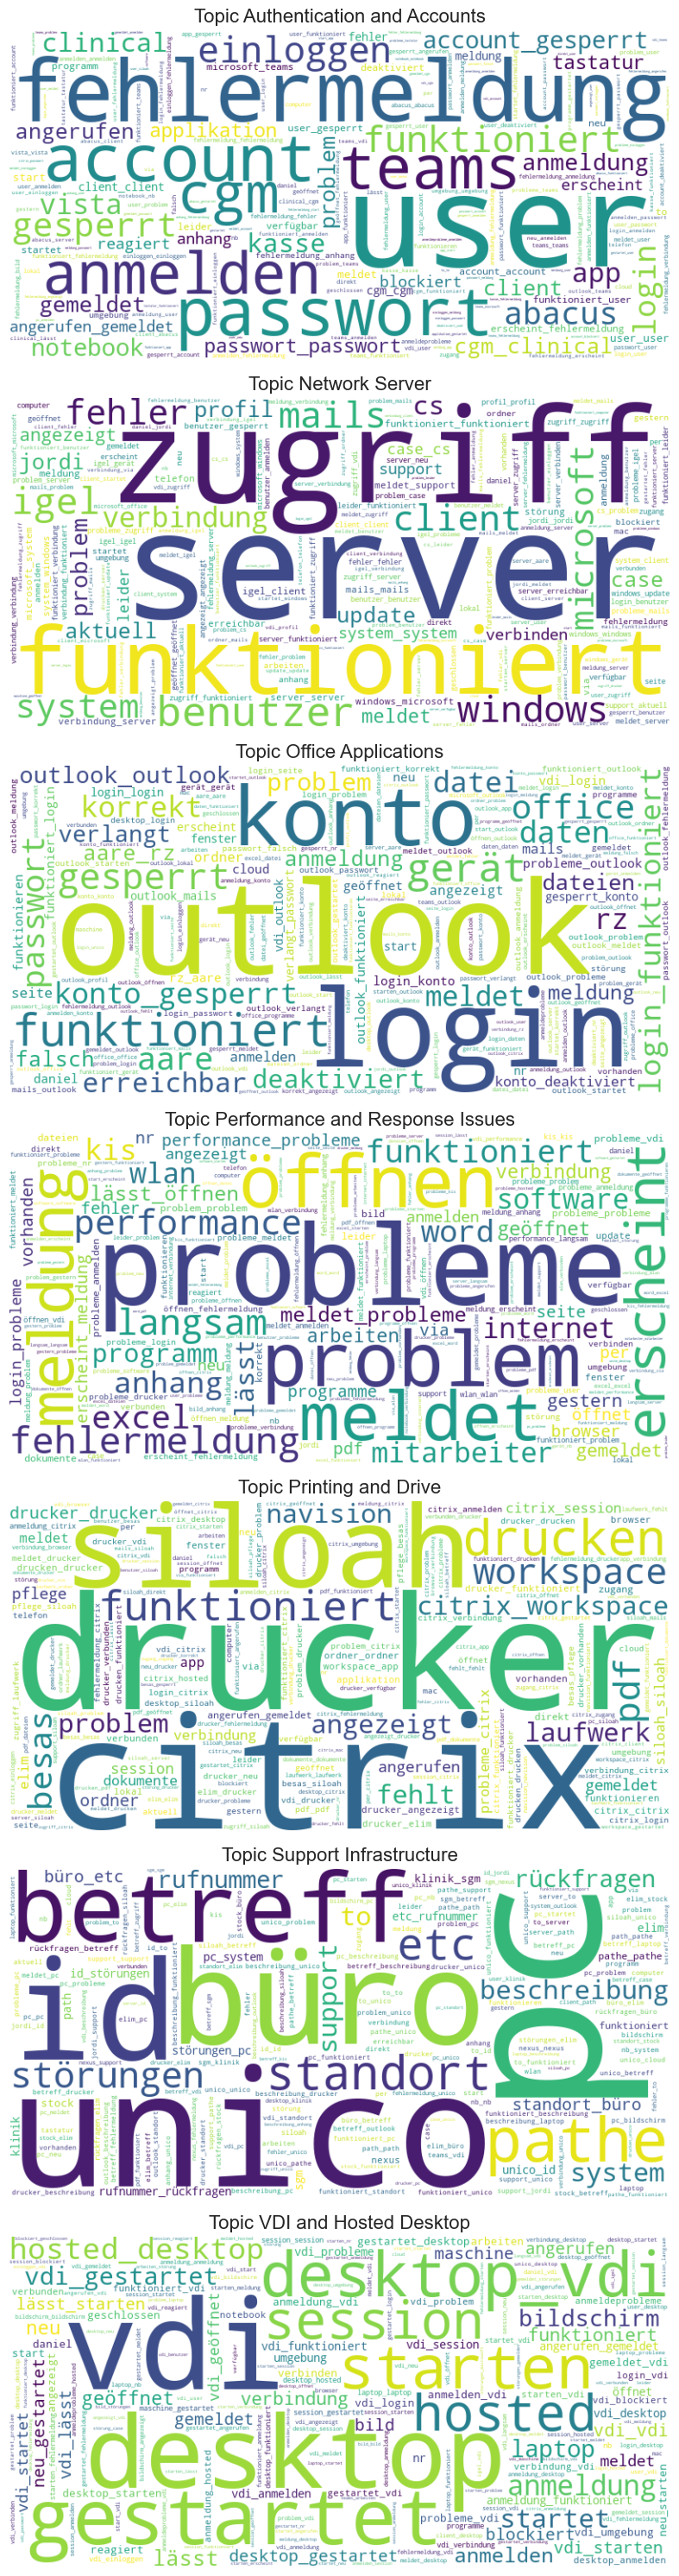

In [17]:
# import topic labels
topic_labels = pd.read_csv('Data/topicModel_descriptions_lda_td.csv')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Group the data by topic
grouped_data = topic_labels.groupby('topic')

# Create a word cloud for each topic
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20, 30))

for (topic, group), ax in zip(grouped_data, axes.flatten()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(group['term'], group['beta'])))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic}', fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

